<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de 8 puntos, Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 13 de marzo a las 10:00 am. Evite el uso de inteligencia artificial y realice un análisis cuidadoso de los errores.



(80 %) En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



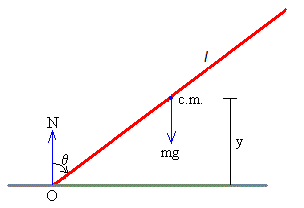


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?




### Matrices: Rotación  en el plano, autovalores y autovectores
8 (20%).   Considere la siguiente matrix de rotación:
\begin{bmatrix}
\cos \theta & -\sin \theta\\
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución.

Encontrar los autovalores y autovectores para $\theta=45$.
**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

INCISO #1:


In [1]:
from scipy.integrate import quad
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [3]:
def func(array,t,l,g):
  teta= array[0]
  w= array[1]
  alpha= ((2*g/l - w**2*np.cos(teta))/(1/3 + np.sin(teta)**2))*np.sin(teta)
  return np.array([w,alpha])

In [4]:
#parametros
L= 0.1 #m
g=9.8 #m/s
t= np.linspace(0,.16,50)

soledo= odeint(func,np.array([np.pi/12,0]),t,args=(L,g))

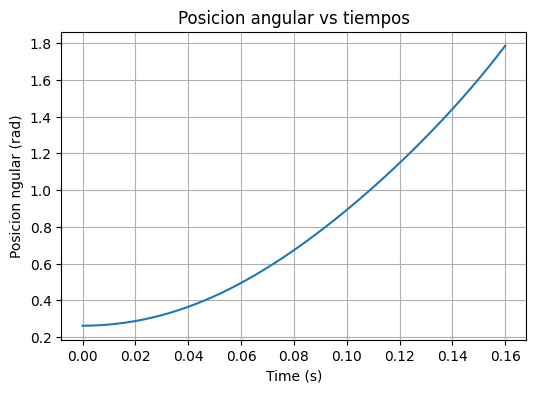

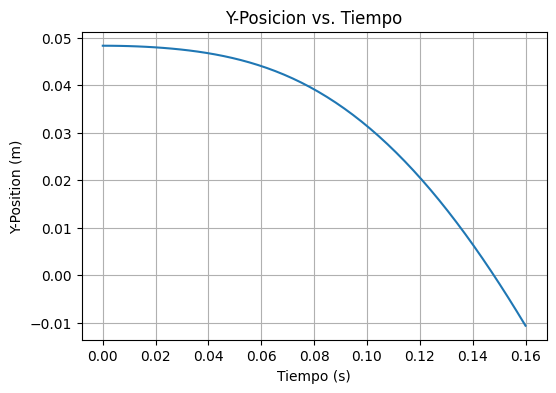

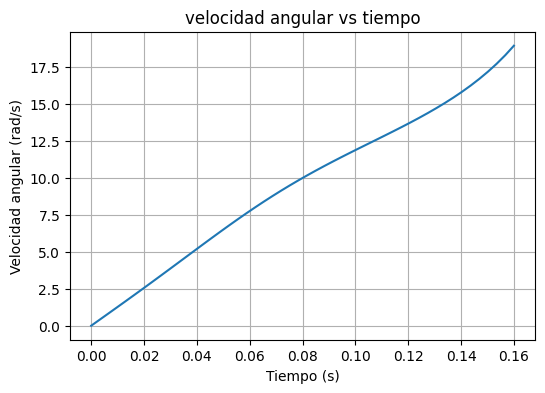

In [26]:
pos_teta= soledo[:,0]
pos_y= L/2*np.cos(pos_teta)
vel_teta= soledo[:,1]

# posicion angular vs tiempos
plt.figure(figsize=(6, 4))
plt.plot(t, pos_teta)
plt.xlabel('Time (s)')
plt.ylabel('Posicion ngular (rad)')
plt.title('Posicion angular vs tiempos')
plt.grid(True)
plt.show()

# posicion-y vs tiempos
plt.figure(figsize=(6, 4))
plt.plot(t, pos_y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Y-Position (m)')
plt.title('Y-Posicion vs. Tiempo')
plt.grid(True)
plt.show()

# velocidad angular vs tiempos
plt.figure(figsize=(6, 4))
plt.plot(t, vel_teta)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('velocidad angular vs tiempo')
plt.grid(True)
plt.show()


##Obtencion del tiempo para el cual el lapiz cae el suelo

la poscion es valida desde t=0 hasta t= 0.1479732041379914


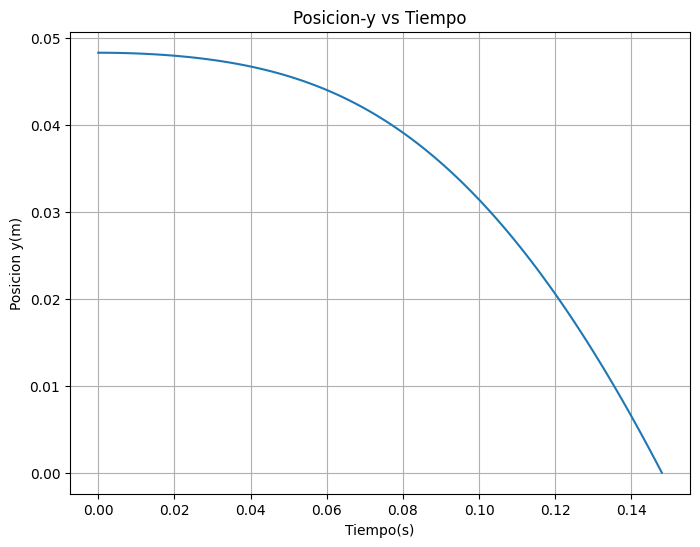

In [24]:
from scipy.interpolate import interp1d
from scipy import optimize

f = interp1d(t, pos_y)  # Crea una función de interpolación lineal

root = optimize.root_scalar(f, method='secant', x0=0.14, x1=0.16)
tiempo_cero = root.root
print('la poscion es valida desde t=0 hasta t=',tiempo_cero)

#Grafica posicion-y vs tiempo para tiempos entre 0 y t=tiempo_cero
t_plot = np.linspace(0,tiempo_cero,100)
sol = odeint(func,np.array([np.pi/12,0]),t_plot,args=(L,g))
pos_y2 = L/2 *np.cos(sol[:,0])
plt.figure(figsize=(8, 6))
plt.plot(t_plot,pos_y2)
plt.xlabel("Tiempo(s)")
plt.ylabel("Posicion y(m)")
plt.title("Posicion-y vs Tiempo")
plt.grid(True)
plt.show()

##Podemos considerar valido esto para tiempos desde $t=0$ hasta $t= 0.15$ aproximadamente

##Posicion angular como funcion del tiempo

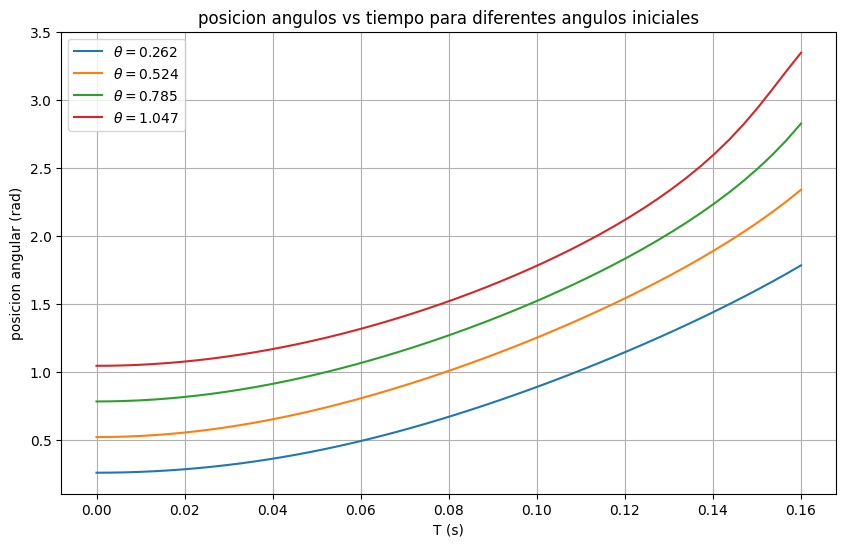

In [25]:
##Angulos iniciales
angulos = [np.pi/12, np.pi/6, np.pi/4, np.pi/3]


plt.figure(figsize=(10, 6))


for theta0 in angulos:
  sol = odeint(func, np.array([theta0, 0]), t, args=(L, g))
  pos_teta = sol[:, 0]
  thetared= round(theta0,3)
  plt.plot(t, pos_teta, label=r'$\theta = $' + str(thetared))


plt.xlabel('T (s)')
plt.ylabel('posicion angular (rad)')
plt.title('posicion angulos vs tiempo para diferentes angulos iniciales')
plt.legend()
plt.grid(True)
plt.show()


##Timepo de caida en funcion del tiempo

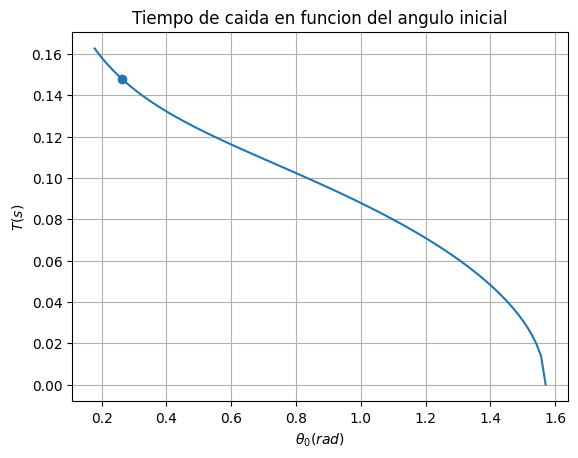

In [9]:
x= sp.symbols('x')

def funi(theta0):
  return sp.sqrt( (1/3 +sp.sin(x)**2) /  (sp.cos(theta0)- sp.cos(x)) )

def T(theta0):
  funi_num = sp.lambdify(x, funi(theta0), 'numpy')  # se usa lambdify para convertir la expresión simbólica a una función numérica
  return 1/2 * sp.sqrt(0.1/9.8) * quad(funi_num,theta0,sp.pi/2)[0]

#===========GRAFICA===========================
angulos = np.linspace(np.pi/12 - 1/12 ,np.pi/2, 100) ##Se toman datos de angulos menores a pi/12 para ver mejor la grafica
Ts_caida= []
for i in angulos:
  Ts_caida.append(T(i))

plt.plot(angulos,Ts_caida)
plt.scatter(np.pi/12, tiempo_cero)
plt.title('Tiempo de caida en funcion del angulo inicial')
plt.xlabel(r'$\theta_0 (rad)$')
plt.ylabel(r'$T (s)$')
plt.grid(True)
plt.xticks()
plt.show()


#Se puede evidenciar claramente que el punto $(\pi/12,0.15)$ pertenece a la curva. Dicho punto es obtenido cuando el lapiz cae en el caso de tener un angulo inicial $ \theta_0=\pi/12$ llega al piso. Por lo tanto concluimos que concuerdan las respuestas anteriores con la de esta grafica

#INCISO 2


In [102]:
sp.init_printing(use_latex='mathjax')

theta = sp.symbols('theta')

A = sp.Matrix([[sp.cos(theta), -sp.sin(theta)],
               [sp.sin(theta), sp.cos(theta)]])

# a) Polinomio característico
lamda = sp.symbols('lambda')
poly = A.charpoly(lamda)
print("Polinomio característico:")
display(poly.as_expr())

# b) Autovalores y autovectores
eigen_vals = A.eigenvals()
eigen_vecs = A.eigenvects()

eigen_vals_list = list(eigen_vals.keys())

print("\nAutovalores:")
display(eigen_vals_list)
print("\nAutovectores:")
display(eigen_vecs)

# c) Matriz diagonal y comprobación
D = sp.diag(*eigen_vals_list)
P = sp.Matrix.hstack(*[vec[2][0] for vec in eigen_vecs])
P_inv = P.inv()

# Caso para theta = 45 grados
theta_45 = sp.rad(45)  # Convertir a radianes
A_45 = A.subs(theta, theta_45)

eigenval45 = A_45.eigenvals()
eigenvec45 = A_45.eigenvects()

eigenval45_lista = list(eigenval45.keys())

print("\nAutovalores para theta = 45 grados:")
display(eigenval45_lista)
print("\nAutovectores para theta = 45 grados:")
display(eigenvec45)

D_45 = sp.diag(*eigenval45_lista)
P_45 = sp.Matrix.hstack(*[vec[2][0] for vec in eigenvec45])
P_45_inv = P_45.inv()

print("\nComprobación A_45 = P_45 * D_45 * P_45_inv:")

display(sp.simplify(P_45 * D_45 * P_45_inv))
display(A_45)

Polinomio característico:


 2                 
λ  - 2⋅λ⋅cos(θ) + 1


Autovalores:


⎡    ___________________________             ___________________________         ⎤
⎣- ╲╱ (cos(θ) - 1)⋅(cos(θ) + 1)  + cos(θ), ╲╱ (cos(θ) - 1)⋅(cos(θ) + 1)  + cos(θ)⎦


Autovectores:


⎡⎛                                             ⎡⎡     sin(θ)     ⎤⎤⎞  ⎛                            ↪
⎢⎜                                             ⎢⎢────────────────⎥⎥⎟  ⎜                            ↪
⎢⎜    ___________________________              ⎢⎢   _____________⎥⎥⎟  ⎜  _________________________ ↪
⎢⎜- ╲╱ (cos(θ) - 1)⋅(cos(θ) + 1)  + cos(θ), 1, ⎢⎢  ╱    2        ⎥⎥⎟, ⎜╲╱ (cos(θ) - 1)⋅(cos(θ) + 1 ↪
⎢⎜                                             ⎢⎢╲╱  cos (θ) - 1 ⎥⎥⎟  ⎜                            ↪
⎢⎜                                             ⎢⎢                ⎥⎥⎟  ⎜                            ↪
⎣⎝                                             ⎣⎣       1        ⎦⎦⎠  ⎝                            ↪

↪                 ⎡⎡    -sin(θ)     ⎤⎤⎞⎤
↪                 ⎢⎢────────────────⎥⎥⎟⎥
↪ __              ⎢⎢   _____________⎥⎥⎟⎥
↪ )  + cos(θ), 1, ⎢⎢  ╱    2        ⎥⎥⎟⎥
↪                 ⎢⎢╲╱  cos (θ) - 1 ⎥⎥⎟⎥
↪                 ⎢⎢                ⎥⎥⎟⎥
↪                 ⎣⎣       1        ⎦⎦⎠⎦


Autovalores para theta = 45 grados:


⎡√2   √2⋅ⅈ  √2   √2⋅ⅈ⎤
⎢── - ────, ── + ────⎥
⎣2     2    2     2  ⎦


Autovectores para theta = 45 grados:


⎡⎛              ⎡⎡        ⎛√2   √2⋅ⅈ⎞⎤⎤⎞  ⎛              ⎡⎡        ⎛√2   √2⋅ⅈ⎞⎤⎤⎞⎤
⎢⎜√2   √2⋅ⅈ     ⎢⎢-1 + √2⋅⎜── - ────⎟⎥⎥⎟  ⎜√2   √2⋅ⅈ     ⎢⎢-1 + √2⋅⎜── + ────⎟⎥⎥⎟⎥
⎢⎜── - ────, 1, ⎢⎢        ⎝2     2  ⎠⎥⎥⎟, ⎜── + ────, 1, ⎢⎢        ⎝2     2  ⎠⎥⎥⎟⎥
⎢⎜2     2       ⎢⎢                   ⎥⎥⎟  ⎜2     2       ⎢⎢                   ⎥⎥⎟⎥
⎣⎝              ⎣⎣         1         ⎦⎦⎠  ⎝              ⎣⎣         1         ⎦⎦⎠⎦


Comprobación A_45 = P_45 * D_45 * P_45_inv:


⎡√2  -√2 ⎤
⎢──  ────⎥
⎢2    2  ⎥
⎢        ⎥
⎢√2   √2 ⎥
⎢──   ── ⎥
⎣2    2  ⎦

⎡√2  -√2 ⎤
⎢──  ────⎥
⎢2    2  ⎥
⎢        ⎥
⎢√2   √2 ⎥
⎢──   ── ⎥
⎣2    2  ⎦